# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [2]:
def read_data(path):
    dataframe = pd.read_csv(path)
    
    status = dataframe['status']
    dataframe = dataframe.drop(['name', 'status'], axis=1)

    return dataframe, status

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [3]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

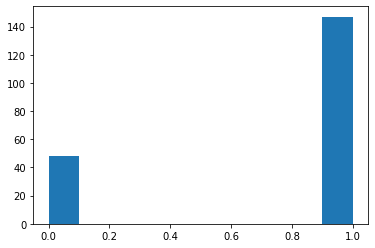

In [5]:
print(data_X.columns)
plt.hist(data_Y)

Plot the histograms of the first 5 attributes. 

MDVP:Fo(Hz)


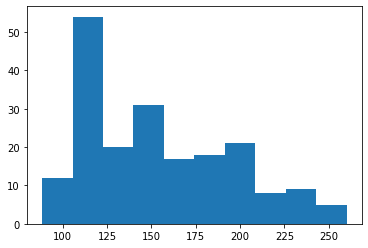

MDVP:Fhi(Hz)


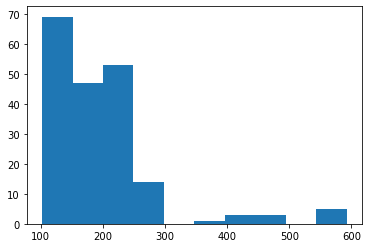

MDVP:Flo(Hz)


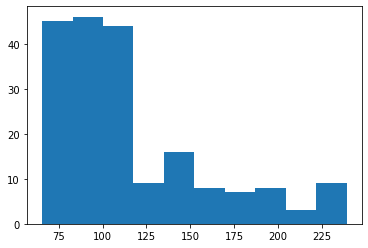

MDVP:Jitter(%)


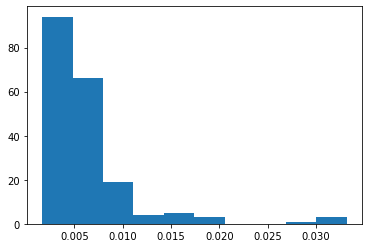

MDVP:Jitter(Abs)


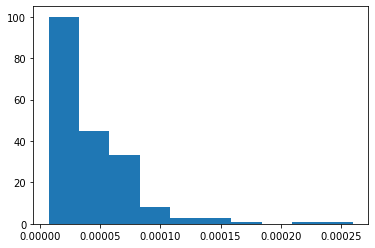

In [6]:
for column in data_X.columns[:5]:
    print(column)
    plt.hist(data_X[column])
    plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [7]:
def split_data(data_X, data_Y, test_percent = 20, random_state=5):
    return train_test_split(data_X, data_Y, test_size=test_percent/100, random_state=random_state)
    
train_X, test_X, train_Y, test_Y = split_data(data_X, data_Y)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])
print(train_X.columns)

rows in train set:  156
rows in test set: 39
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [46]:
def get_classifier(k=3):
    return KNeighborsClassifier(n_neighbors=k)

def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k=3):
    neigh = get_classifier(k=k)
    neigh.fit(train_data_X, train_data_Y)
    predictions = neigh.predict(test_data_X)
    return metrics.accuracy_score(test_data_Y, predictions)

get_classification_accuracy(train_X, train_Y, test_X, test_Y, k=3)

0.7692307692307693

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [47]:
def standarize_train_and_test(train_X, test_X):
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    return train_X, test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.9743589743589743

# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

1 0.9550403225806452 [0.96875    0.96774194 0.96774194 0.96774194 0.90322581]
2 0.9106854838709678 [0.84375    0.93548387 0.93548387 0.93548387 0.90322581]
3 0.9106854838709678 [0.84375    0.87096774 0.96774194 0.90322581 0.96774194]
4 0.904233870967742 [0.84375    0.87096774 0.96774194 0.93548387 0.90322581]
5 0.897983870967742 [0.8125     0.93548387 0.90322581 0.90322581 0.93548387]
6 0.8913306451612903 [0.84375    0.87096774 0.90322581 0.90322581 0.93548387]
7 0.8850806451612904 [0.8125     0.90322581 0.87096774 0.90322581 0.93548387]
8 0.8913306451612903 [0.84375    0.90322581 0.87096774 0.90322581 0.93548387]
9 0.8717741935483871 [0.875      0.87096774 0.87096774 0.90322581 0.83870968]
10 0.8653225806451614 [0.875      0.83870968 0.87096774 0.90322581 0.83870968]
11 0.8461693548387098 [0.84375    0.83870968 0.87096774 0.87096774 0.80645161]
12 0.839717741935484 [0.84375    0.83870968 0.87096774 0.87096774 0.77419355]
13 0.8588709677419356 [0.875      0.83870968 0.87096774 0.870967

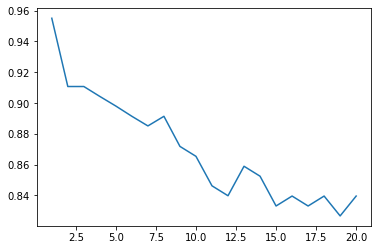

In [48]:
norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
scores_avg = []
for k in range(1, 21):
    kneigh = get_classifier(k=k)
    scores = cross_validate(kneigh, norm_train_X, train_Y, cv=5, scoring='accuracy')
    score = sum(scores['test_score'])/len(scores['test_score'])
    print(k, score, scores['test_score'])
    scores_avg.append(score)
plt.plot(range(1, 21), scores_avg)

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [11]:
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=1)

0.9743589743589743

# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
def read_data(path, y_column):
    dataframe = pd.read_csv(path)
    
    data_y = dataframe[y_column]
    dataframe = dataframe.drop(y_column, axis=1)
    
    return dataframe, data_y

data_x, data_y = read_data('winequality-red.csv', 'quality')

In [14]:
random_state = 42
train_size = 0.8

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=train_size, random_state=random_state)

In [37]:
def make_classifier_knn(k):
    return make_pipeline(preprocessing.StandardScaler(), 
                         KNeighborsClassifier(n_neighbors=k, weights='distance'))

def score_classifier(x_train, y_train, x_test, y_test, classifier):
    classifier.fit(x_train, y_train)
    labels = classifier.predict(x_test)
    return metrics.accuracy_score(y_test, labels)

score_classifier(x_train, y_train, x_test, y_test, make_classifier_knn(k=13))

0.71875

In [34]:
def crossvalidate(make_classifier):
    scores_avg = []
    k_range = range(1, 31)
    for k in k_range:
        knn = make_classifier(k=k)
        scores = cross_validate(knn, x_train, y_train, cv=10, scoring='accuracy')
        mean = sum(scores['test_score'])/len(scores['test_score'])
        #print(k, mean)
        scores_avg.append(mean)
    return k_range, scores_avg
        
def plot_scores(k_range, scores_avg, label=None, fig=None, ax=None):
    if not fig:
        fig, ax = plt.subplots()
    ax.plot(k_range, scores_avg, label=label)
    ax.set_xlabel('k')
    ax.set_ylabel('Dokładność [%]')
    if label:
        ax.legend()
    #plt.savefig('plot.png', dpi=144.0)
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc7d119d610>)

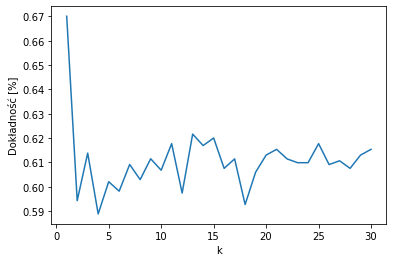

In [35]:
scores = crossvalidate(make_classifier_knn)
plot_scores(*scores)

In [17]:
score_classifier(x_train, y_train, x_test, y_test, make_classifier_knn(k=14))

0.7

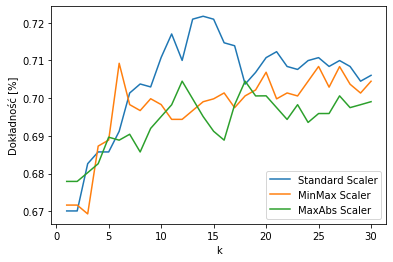

In [29]:
def make_classifier_minmax(k):
    return make_pipeline(preprocessing.MinMaxScaler(), 
                         KNeighborsClassifier(n_neighbors=k, weights='distance'))

def make_classifier_maxabs(k):
    return make_pipeline(preprocessing.MaxAbsScaler(), 
                         KNeighborsClassifier(n_neighbors=k, weights='distance'))

def make_classifier_robust(k):
    return make_pipeline(preprocessing.RobustScaler(), 
                         KNeighborsClassifier(n_neighbors=k, weights='distance'))

scores = crossvalidate(make_classifier_knn)
fig, ax = plot_scores(*scores, label='Standard Scaler')

scores = crossvalidate(make_classifier_minmax)
fig, ax = plot_scores(*scores, label='MinMax Scaler', fig=fig, ax=ax)

scores = crossvalidate(make_classifier_maxabs)
fig, ax = plot_scores(*scores, label='MaxAbs Scaler', fig=fig, ax=ax)

#crossvalidate(make_classifier_robust)